# Neural Network Model Trainning

## Module Dependencies

In [1]:
# Import
import pandas as pd
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Set the option to display all columns
pd.set_option("display.max_columns", None)

## Data Loading

In [2]:
# Load the dataset
file_path = "Resources/Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(file_path)

# Show the original DataFrame
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Show the DataFrame basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Data Preprocessing

In [4]:
# Remove the "Person ID" column
df.drop("Person ID", axis=1, inplace=True)

# Split the "Blood Pressure" column into "Systolic" and "Diastolic"
df["Systolic"] = df["Blood Pressure"].apply(lambda x: int(x.split("/")[0]))
df["Diastolic"] = df["Blood Pressure"].apply(lambda x: int(x.split("/")[1]))
df.drop("Blood Pressure", axis=1, inplace=True)

# Replace the values on the "Sleep Disorder" column with the value 1 for "Insombia" and the value 2 for "Sleep Apnea"
df["Sleep Disorder"] = df["Sleep Disorder"].map({"Insomnia": 1, "Sleep Apnea": 2})

# Fill the "blanks" of the "Sleep Disorder" column with the value 0
df["Sleep Disorder"] = df["Sleep Disorder"].fillna(0)

# Show the modified DataFrame
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,0.0,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,0.0,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,0.0,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,2.0,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,2.0,140,90


In [5]:
# Define the Machine Learning Model Features and Output
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

# Identify the categorical and numerical columns of the "X" into lists
categorical_columns = ["Gender", "Occupation", "BMI Category"]
numerical_columns = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]

# Transform the categorical columns of the DataFrame into dummy/indicator variables using the function get_dummies()
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the datasets into trainning and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the scaling parameters of numerical columns using the trainning data set
scaler = StandardScaler().fit(X_train[numerical_columns])

In [6]:
# Scale the values of the "X" sets
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Show the trainning set
X_train.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
192,0.055811,-0.833457,-1.155098,-0.728644,0.956601,0.481081,-0.554643,0.186918,0.050678,True,False,False,False,False,False,False,True,False,False,False,False,False,True
75,-1.111141,-1.468533,-1.155098,-1.450369,1.522984,0.481081,-1.180447,-0.448177,-0.746830,True,True,False,False,False,False,False,False,False,False,False,False,False,False
84,-0.877751,0.436694,0.537913,-0.006920,-0.176166,-0.014076,0.696966,-1.083272,-0.746830,True,False,False,False,False,False,False,False,False,True,False,True,False,False
362,1.922934,1.325801,1.384419,0.714805,-1.308933,-0.509234,0.071162,1.457107,1.645692,False,False,False,False,False,True,False,False,False,False,False,False,False,True
16,-1.577922,-0.833457,-2.001604,-0.969219,0.956601,2.461710,-1.806251,0.440955,0.369681,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [7]:
# Use the function to_categorical to encode the integer labels of the "y" sets
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

# Show "y_train"
print(y_train[:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


## Keras Tuner Setting

In [8]:
# Define the number of input parameters
number_input_features = len(X_train.columns)

# Create a method for the hyperparameters optimization of a Sequential Model

def model_optimization(hp):

    # Initialize the sequential model
    nn_model = tf.keras.models.Sequential()

    # Define the activation function options to use in the hidden layers
    activation_function_choice = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Add the first hidden layer of the model
    nn_model.add(tf.keras.layers.Dense(
        units = hp.Int("first_units", min_value = 1, max_value = 10, step = 2), # Allow keras tuner to decide the number of neurons on the first layer
        input_dim = number_input_features,
        activation = activation_function_choice))
    
    # Allow keras tuner to decide the number of hidden layers between
    for i in range(hp.Int("num_layers", 1, 10)):
        nn_model.add(tf.keras.layers.Dense(
            units = hp.Int("units_" + str(i), min_value = 1, max_value = 10, step = 2), # Allow keras tuner to decide the number of neurons on the hidden layers
            activation = activation_function_choice))

    # Add the output layer for the 3 different labels of "Sleep Disorder"
    nn_model.add(tf.keras.layers.Dense(units=3, activation="softmax"))

    # Compile the Sequential model together and customize metrics
    nn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return nn_model

## Hyperparameter Evaluation

In [9]:
# Define the keras tuner
tuner = kt.Hyperband(
    model_optimization,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train, y_train, epochs=40, validation_data = (X_test, y_test))

Trial 178 Complete [00h 00m 08s]
val_accuracy: 0.5733333230018616

Best val_accuracy So Far: 0.9333333373069763
Total elapsed time: 00h 15m 37s


In [10]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 9,
 'num_layers': 1,
 'units_0': 7,
 'units_1': 3,
 'units_2': 5,
 'units_3': 1,
 'units_4': 3,
 'units_5': 7,
 'units_6': 9,
 'units_7': 1,
 'units_8': 9,
 'units_9': 3,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

## Model with Optimized Hyperparameters

### Model Setup

In [11]:
# Initialize the sequential neural network model
nn_model = tf.keras.models.Sequential()

# Add the first hidden layer of the model
nn_model.add(tf.keras.layers.Dense(units=5, input_dim=number_input_features, activation="tanh"))

# Add the second hidden layer of the model
nn_model.add(tf.keras.layers.Dense(units=5, activation="tanh"))

# Add the third hidden layer of the model
nn_model.add(tf.keras.layers.Dense(units=7, activation="tanh"))

# Add the output layer for the 3 different labels of "Sleep Disorder"
nn_model.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# Check the structure of the model
nn_model.summary()

c:\Users\bradl\anaconda3\envs\dev3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 5)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216 (864.00 B)

 Trainable params: 216 (864.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile and Train the Model

In [12]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2074 - loss: 1.1753  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3117 - loss: 1.1062 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4320 - loss: 1.0627 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4936 - loss: 0.9977 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6234 - loss: 0.9472 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7389 - loss: 0.8854 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7345 - loss: 0.8763 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7437 - loss: 0.8313 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 0.7972 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7313 - loss: 0.7763 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7470 - loss: 0.7556 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

### Trainned Model Performance

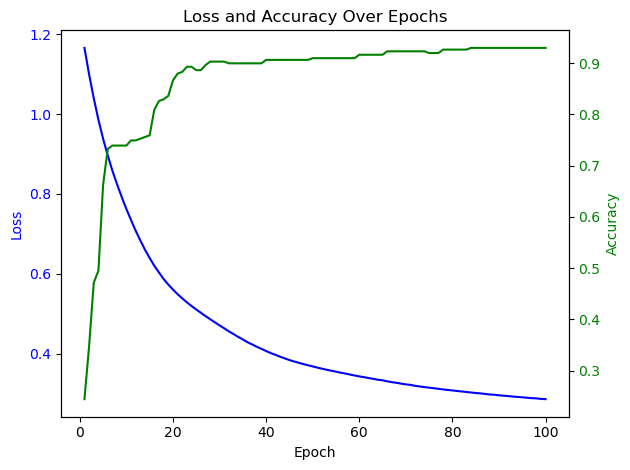

In [13]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss and accuracy

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot 'loss' on the primary y-axis
ax1.plot(history_df.index, history_df["loss"], color="blue", label="Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a secondary y-axis for 'accuracy'
ax2 = ax1.twinx()
ax2.plot(history_df.index, history_df["accuracy"], color="green", label="Accuracy")
ax2.set_ylabel("Accuracy", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Add a title and show the plot
plt.title("Loss and Accuracy Over Epochs")
fig.tight_layout()
plt.show()

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)

3/3 - 0s - 42ms/step - accuracy: 0.8933 - loss: 0.3771


In [15]:
#Save the trained model
nn_model.save("sleep_disorder_model.h5")